In [0]:
import gdown

In [0]:
url = "https://drive.google.com/uc?id=1cZJu7L55oeE3qRpESnGSE_v6CV2NW9pw"

In [0]:
gdown.download(url,'data1',quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cZJu7L55oeE3qRpESnGSE_v6CV2NW9pw
To: /content/data1
74.6MB [00:01, 40.5MB/s]


'data1'

In [0]:
import zipfile 
with zipfile.ZipFile("data1",'r') as zip_ref:
   zip_ref.extractall('data2/')

In [0]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


# 5 conv / dropout=.25 / SGD / lr=.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 510s 4s/step - loss: 3.1684 - acc: 0.0562 - val_loss: 3.1561 - val_acc: 0.0534
Epoch 2/15
125/125 [==============================] - 463s 4s/step - loss: 3.1528 - acc: 0.0562 - val_loss: 3.1392 - val_acc: 0.0493
Epoch 3/15
125/125 [==============================] - 466s 4s/step - loss: 3.1387 - acc: 0.0615 - val_loss: 3.1169 - val_acc: 0.1103
Epoch 4/15
125/125 [==============================] - 470s 4s/step - loss: 3.0901 - acc: 0.0977 - val_loss: 2.9695 - val_acc: 0.0927
Epoch 5/15
125/125 [==============================] - 466s 4s/step - loss: 2.6011 - acc: 0.2336 - val_loss: 1.9721 - val_acc: 0.3862
Epoch 6/15
125/125 [==============================] - 493s 4s/step - loss: 1.8794 - acc: 0.4286 - val_loss: 1.4687 - val_acc: 0.6210
Epoch 7/15
125/125 [==============================] - 477s 4s/step - loss: 1.2906 - acc: 0.5973 - val_loss: 1.1539 - 

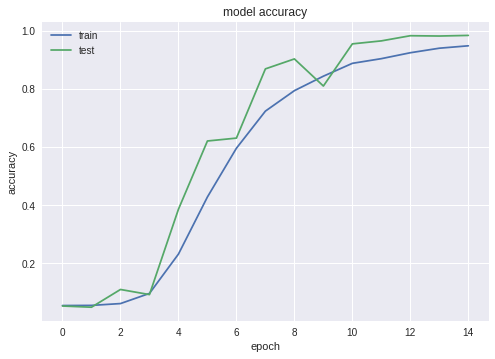

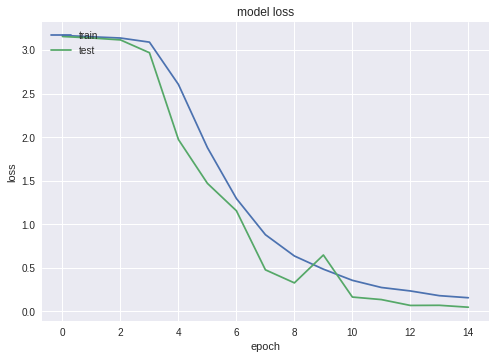

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

# Adding fourth convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

#Adding 5th Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 5 conv / dropout=.50 / SGD / lr=.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 501s 4s/step - loss: 3.1710 - acc: 0.0555 - val_loss: 3.1603 - val_acc: 0.0535
Epoch 2/15
125/125 [==============================] - 475s 4s/step - loss: 3.1541 - acc: 0.0580 - val_loss: 3.1384 - val_acc: 0.0897
Epoch 3/15
125/125 [==============================] - 473s 4s/step - loss: 3.1248 - acc: 0.0762 - val_loss: 3.0797 - val_acc: 0.0754
Epoch 4/15
125/125 [==============================] - 474s 4s/step - loss: 2.9289 - acc: 0.1454 - val_loss: 2.3736 - val_acc: 0.3769
Epoch 5/15
125/125 [==============================] - 475s 4s/step - loss: 2.3580 - acc: 0.2927 - val_loss: 1.9391 - val_acc: 0.3695
Epoch 6/15
125/125 [==============================] - 488s 4s/step - loss: 1.8674 - acc: 0.4239 - val_loss: 1.3440 - val_acc: 0.6056
Epoch 7/15
125/125 [==============================] - 479s 4s/step - loss: 1.4135 - acc: 0.5571 - val_loss: 0.8456 - 

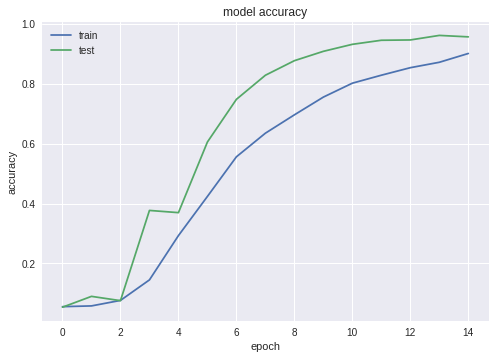

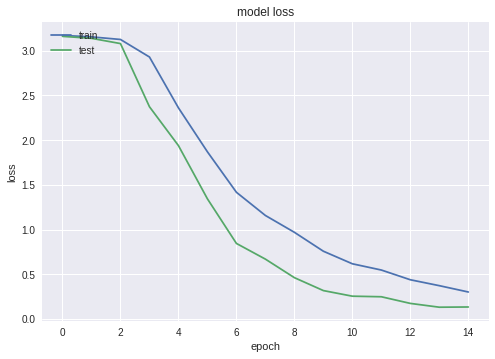

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

# Adding fourth convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

#Adding 5th Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
